# EMOPIAモデル作成

## データ作成

### 1. x軸決定 (valance HQ1Q4 | LQ2Q3)  

In [1]:
#  csvファイル読み込み
import numpy as np
import pandas as pd

df1 = pd.read_csv('sample_data/emotion_valence.csv')
print(df1)

      Unnamed: 0                  file emotion  \
0              0  Q3_egYSmNuIFGk_1.mid      LV   
1              1  Q2_ItGNJM6skM4_1.mid      LV   
2              2  Q4_12tDlCQVRtA_2.mid      HV   
3              3  Q1_eVMSeElk81Q_0.mid      HV   
4              4  Q4_ldCQ6N9G6Mk_5.mid      HV   
...          ...                   ...     ...   
1066        1066  Q1_8izVTDgBQPc_0.mid      HV   
1067        1067  Q2_JT1XJnVmABo_6.mid      LV   
1068        1068  Q1_UYh88SRZC24_0.mid      HV   
1069        1069  Q2__vZOEQCYSaY_1.mid      LV   
1070        1070  Q4_r_sD61KeUQU_0.mid      HV   

                                 Inference values  
0          [-1.3746258020401, 1.8604803085327148]  
1         [-1.178092360496521, 1.412343144416809]  
2       [1.4768037796020508, -1.2031389474868774]  
3      [0.21351230144500732, -0.2234000712633133]  
4       [0.5807998180389404, -0.5487675666809082]  
...                                           ...  
1066     [0.47458615899086, -0.4303

In [ ]:
#データ取得
# # 正規化 (列方向)
import scipy.stats
import ast

HL0 = df1['Inference values'].values #scipy.stats.zscore
HL = np.zeros((0,2))
for HL00 in HL0:
   HL000 = ast.literal_eval(HL00)
   #x1 = ast.literal_eval('np.array([-5 -2 +0 +3])')
   HL = np.append(HL,np.array([HL000]), axis=0)
HL = scipy.stats.zscore(HL)
print(HL)

<class 'numpy.ndarray'>
[[-1.3746258   1.86048031]
 [-1.17809236  1.41234314]
 [ 1.47680378 -1.20313895]
 ...
 [ 0.53418308 -0.48548281]
 [-1.15168679  1.48617589]
 [ 0.84221375 -0.46019942]]
[[-1.01270351  1.14113679]
 [-0.84123828  0.78024789]
 [ 1.47502075 -1.32602347]
 ...
 [ 0.65263313 -0.7480885 ]
 [-0.81820079  0.83970607]
 [ 0.9213739  -0.72772755]]


In [3]:
# HLの最大値と最小値を取得
HL_max = np.amax(HL)
print(HL_max)
HL_min = np.amin(HL)
print(HL_min)

3.7840054299160792
-3.445594226573046


In [ ]:
# H(Q1Q4) + L(Q1Q4)
HL_vl = []
for valance in HL:
  HL_vl0 =  valance[[0]] - valance[[1]]
  HL_vl.extend(HL_vl0)
HL_vl = np.abs(HL_vl) # 座標の絶対値 
print(HL_vl)

* 座標：{0,1}

In [15]:
# HL_vl → 最小値０　最大値１
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
HL_vl = np.array(HL_vl)
HL_vl_ms = ms.fit_transform(HL_vl.reshape(-1, 1))
print(HL_vl_ms)

[[0.29766115]
 [0.22399868]
 [0.38721552]
 ...
 [0.19345123]
 [0.22903825]
 [0.22781984]]


* 座標：{-1,1}

In [16]:
# x座標決定
HL_Q = df1['emotion']
x_data = []
i = 0

for i, x_data0 in enumerate(HL_vl_ms):
    if HL_Q[i] == 'LV':
        x_data.extend(-x_data0)
    else :
        x_data.extend(x_data0)
    i = i + 1
x_data = np.array(x_data)

### 2. y軸決定 (Arousal HQ1Q2 | LQ3Q4)  

* valenceと同様

In [10]:
#  csvファイル読み込み
import numpy as np
import pandas as pd

df2 = pd.read_csv('sample_data/emotion_arousal.csv')
print(df2)

      Unnamed: 0                  file emotion  \
0              0  Q3_egYSmNuIFGk_1.mid      LA   
1              1  Q2_ItGNJM6skM4_1.mid      HA   
2              2  Q4_12tDlCQVRtA_2.mid      LA   
3              3  Q1_eVMSeElk81Q_0.mid      HA   
4              4  Q4_ldCQ6N9G6Mk_5.mid      HA   
...          ...                   ...     ...   
1066        1066  Q1_8izVTDgBQPc_0.mid      HA   
1067        1067  Q2_JT1XJnVmABo_6.mid      HA   
1068        1068  Q1_UYh88SRZC24_0.mid      HA   
1069        1069  Q2__vZOEQCYSaY_1.mid      HA   
1070        1070  Q4_r_sD61KeUQU_0.mid      LA   

                                Inference values  
0      [-1.0159459114074707, 0.1541997343301773]  
1       [1.596572756767273, -2.6438066959381104]  
2        [-2.365659236907959, 1.983385682106018]  
3      [2.1968867778778076, -2.9148449897766113]  
4      [0.8424277305603027, -0.9957510828971863]  
...                                          ...  
1066   [2.3213582038879395, -3.07297515869

In [17]:
#データ取得
# # 正規化
import scipy.stats
import ast

HL02 = df2['Inference values'].values #scipy.stats.zscore
HL2 = np.zeros((0,2))
for HL002 in HL02:
   HL0002 = ast.literal_eval(HL002)
   HL2 = np.append(HL2,np.array([HL0002]), axis=0)
print(type(HL2))

HL2 = scipy.stats.zscore(HL2)
print(HL2)

<class 'numpy.ndarray'>
[[-1.16222923  0.89570581]
 [ 0.57766258 -0.64418421]
 [-2.06111473  1.90240299]
 ...
 [ 0.98728384 -0.88417656]
 [-0.45558021  0.39464759]
 [-1.27859457  1.16135101]]


In [18]:
# H(Q1Q4) + L(Q1Q4)
HL_vl2 = []
for valance2 in HL2:
  HL_vl02 =  valance2[[0]] - valance2[[1]]
  HL_vl2.extend(HL_vl02)
HL_vl2 = np.abs(HL_vl2)

# HL_vlを標準化　最小値０　最大値１
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
HL_vl2 = np.array(HL_vl2)
HL_vl_ms2 = ms.fit_transform(HL_vl2.reshape(-1, 1))
print(HL_vl_ms2)

[[0.50818175]
 [0.30127617]
 [0.97975359]
 ...
 [0.46203513]
 [0.20931215]
 [0.60271735]]


In [19]:
# x座標決定
HL_Q2 = df2['emotion']
y_data = []
j = 0

for j, y_data0 in enumerate(HL_vl_ms2):
    if HL_Q2[j] == 'LA':
        y_data.extend(-y_data0)
    else :
        y_data.extend(y_data0)
    j = j + 1
y_data = np.array(y_data)

### x,y座標をひとまとめに (xy_data)

In [20]:
print(x_data.shape)
print(type(x_data))

xy_data = np.stack([x_data, y_data])
print(xy_data.T)
print(xy_data.T.shape)

(1071,)
<class 'numpy.ndarray'>
[[-0.29766115 -0.50818175]
 [-0.22399868  0.30127617]
 [ 0.38721552 -0.97975359]
 ...
 [ 0.19345123  0.46203513]
 [-0.22903825  0.20931215]
 [ 0.22781984 -0.60271735]]
(1071, 2)


### 属性値1496つの読み込み →　座標値と一緒にまとめる

In [21]:
df = pd.read_csv('total_attribute.csv')
print(df)

      Unnamed: 0                  file emotion  \
0              0  Q3_egYSmNuIFGk_1.mid      Q4   
1              1  Q2_ItGNJM6skM4_1.mid      Q2   
2              2  Q4_12tDlCQVRtA_2.mid      Q4   
3              3  Q1_eVMSeElk81Q_0.mid      Q1   
4              4  Q4_ldCQ6N9G6Mk_5.mid      Q3   
...          ...                   ...     ...   
1066        1066  Q1_8izVTDgBQPc_0.mid      Q1   
1067        1067  Q2_JT1XJnVmABo_6.mid      Q2   
1068        1068  Q1_UYh88SRZC24_0.mid      Q1   
1069        1069  Q2__vZOEQCYSaY_1.mid      Q3   
1070        1070  Q4_r_sD61KeUQU_0.mid      Q4   

                                       Inference values  \
0     [-5.133843421936035, -2.388230085372925, 0.889...   
1     [0.7616333365440369, 1.4124573469161987, -1.96...   
2     [-10.658978462219238, -7.839699745178223, 5.11...   
3     [2.777733087539673, 2.210918664932251, -3.9450...   
4     [0.001048949547111988, -1.248039722442627, 0.8...   
...                                          

In [22]:
#ファイル名抽出
list_f = df['file']
print(list_f)

# 属性値csvファイル読み込み
import os

#ファイル名抽出
a = []
i = 0
for l_f in list_f:
    try:
        list0 = np.genfromtxt(os.path.splitext('sample_data/'+ l_f)[0] + '.csv', delimiter=',' , dtype='float', filling_values=0)
        list = np.array(list0[1])
    except:#FileNotFoundError:
        print(l_f)
        list0 = np.empty_like(list0[1])
        list = np.array(list0)
    a.append(list)
    i = i + 1
print(i)
print(type(a))

0       Q3_egYSmNuIFGk_1.mid
1       Q2_ItGNJM6skM4_1.mid
2       Q4_12tDlCQVRtA_2.mid
3       Q1_eVMSeElk81Q_0.mid
4       Q4_ldCQ6N9G6Mk_5.mid
                ...         
1066    Q1_8izVTDgBQPc_0.mid
1067    Q2_JT1XJnVmABo_6.mid
1068    Q1_UYh88SRZC24_0.mid
1069    Q2__vZOEQCYSaY_1.mid
1070    Q4_r_sD61KeUQU_0.mid
Name: file, Length: 1071, dtype: object
Q2_snfsc7pEzlk_0.mid
1071
<class 'list'>


* 音楽属性値をcsvに書き込む場合　↓↓

In [23]:
print(np.array(a).shape)
value00 = np.zeros((0))
value = []

for a1 in np.array(a):
    value0 = sum(value00,a1.tolist())
    value.append(value0)
print(type(value))
print(len(value))

(1071, 1496)
<class 'list'>
1071


* csvファイルに座標と属性値を追加

In [24]:
xy_data = xy_data.T
df['Attribute'] = value
df['xy_data'] = xy_data.tolist()
df.to_csv('../../xydata_attribute.csv',index=False) #新しいファイルに一つずつ挿入

## 回帰

In [1]:
import numpy as np
import pandas as pd
import os
import ast

df = pd.read_csv('../xydata_attribute.csv')

x...座標、t（split_command）...属性値)

### 音楽属性値を0,1に変換

In [ ]:
## t ... 音楽属性値(1496つ)
t0 = df['Attribute'].values
t0 = np.array(t0)
t = np.zeros((0,1496))
for tt in t0:
   tt = np.array(ast.literal_eval(tt))
   t = np.append(t,tt)
print(t)
t = t.reshape(1071, 1496)
#columns = dataset.feature_names

In [3]:
# #音楽属性値の0,1の値を決める関数
def binarize_command(command, thresholds):
        discrete_feature = []
        ## 閾値 → tanh
        # commandtanh = np.tanh(command) 
        # discrete_feature.append(commandtanh) 
        
        ## 閾値を用いて0,1に変換する場合
        ''' 
        for k in range(command.shape[0]):
           # print(command.shape[0])
            #print(k)
            thres = thresholds[k]
            discrete_feature.append(np.searchsorted(thres, command[k]))
            #print(discrete_feature)
        '''
        discrete_feature.append(command) 
        return discrete_feature

In [4]:
thresholds = np.load("../../../../../../data/threshold.npy", allow_pickle=True) #閾値
feature_index = np.load("../../../../../../data/feature_index.npy", allow_pickle=True) #特徴量100

split_command = []
print(t)
for k ,t_k in enumerate(t):
    binary_command = binarize_command(t[k][feature_index], thresholds)
    split_command.append(binary_command)
split_command = np.squeeze(np.array(split_command))
print(split_command)
print(split_command.shape)

[[ 0.     0.     0.    ... 11.93  11.93  12.09 ]
 [ 0.     0.     0.    ...  8.277  8.277  7.309]
 [ 0.     0.     0.    ... 10.09  10.09  10.1  ]
 ...
 [ 0.     0.     0.    ... 13.91  13.91  10.96 ]
 [ 0.     0.     0.    ... 13.64  13.64  15.85 ]
 [ 0.     0.     0.    ... 10.97  10.97  10.58 ]]
[[2.237e-01 0.000e+00 3.653e-02 ... 3.306e-01 6.100e+01 1.193e+01]
 [0.000e+00 1.329e-01 1.923e-01 ... 3.053e-01 4.900e+01 8.277e+00]
 [0.000e+00 1.464e-01 0.000e+00 ... 3.582e-01 6.200e+01 1.009e+01]
 ...
 [2.786e-03 1.504e-01 1.309e-01 ... 3.587e-01 7.300e+01 1.391e+01]
 [0.000e+00 1.782e-01 0.000e+00 ... 2.958e-01 5.300e+01 1.364e+01]
 [0.000e+00 7.907e-02 4.651e-03 ... 3.981e-01 7.400e+01 1.097e+01]]
(1071, 100)


In [5]:
x0 = df['xy_data'].values
x0 = np.array(x0)
x = np.zeros((0,2))
for xx in x0:
    x = np.append(x,np.array(ast.literal_eval(xx)))
x = x.reshape(1071, 2)
print(x.shape)

(1071, 2)


### valence , arousal の分布

-0.2239986771362986


Text(0.5, 1.0, 'EMOPIAでマッピングを行った入力感情グラフ')

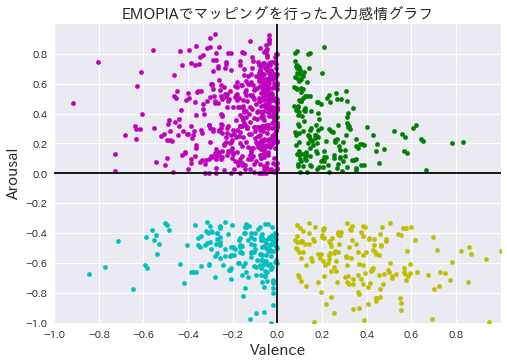

In [17]:
from matplotlib import pyplot as  plt
import seaborn as sns
import japanize_matplotlib
import numpy as np

plt.style.use('seaborn')
plt.rcParams['font.family'] = 'IPAexGothic'  

a = x[:,0]
b = x[:,1]
print(a[1])
#n = 0
#plt.scatter(a,b)
color_list = [ "g", "y" ,"m", "c"] #, "k"]
for n in range(len(x[:,0])):
    if (a[n] >= 0 )& (b[n] >= 0):
        plt.scatter(a[n], b[n], 20 ,color_list[0])
    elif (a[n] >= 0 )& (b[n] < 0):
        plt.scatter(a[n], b[n], 20,color_list[1])
    elif (a[n] < 0 )& (b[n] >= 0):
        plt.scatter(a[n], b[n], 20, color_list[2])
    else:
        plt.scatter(a[n], b[n], 20,color_list[3])
    

plt.xlim(-1.0 , 1.0) # (3)x軸の表示範囲
plt.ylim(-1.0 , 1.0) # (4)y軸の表示範囲
plt.xticks(np.arange(-1.0, 1.0 ,0.20))
plt.yticks(np.arange(-1.0, 1.0 , 0.20)) # plt.tick_params(width = 0.005, length = 0.005)

plt.xlabel('Valence' , fontsize=15)
plt.ylabel('Arousal' , fontsize=15)
plt.hlines(0,-1,1, "k",linestyle="-")
plt.vlines(0,-1,1, "k", linestyle="-")
plt.title('EMOPIAでマッピングを行った入力感情グラフ', fontsize=15)

#plt.text(-0.275, -0.123, "第３章限" , size = 30 )

* 外れ値の抽出　→ 生成音楽の違いを見るため

In [9]:
a = x[:,0]
b = x[:,1]

for n in range(len(x[:,0])):
    if (a[n] >= 0.8)&(b[n] >= 0):
        print('第1章限' + str(split_command[n,:]))
        Q1emotion = split_command[n,:]
    if (a[n] <= -0.9)&(b[n] >= 0):
        print('第２章限' + str(split_command[n,:]))
        Q2emotion = split_command[n,:]
    if (a[n] <= -0.8)&(b[n] <= 0):
        print('第3章限' + str(split_command[n,:]))
        Q3emotion = split_command[n,:]
    if (a[n] >= 0.9)&(b[n] <= -0.8):
        print('第4章限' + str(split_command[n,:]))
        Q4emotion = split_command[n,:]

np.savez('input_real_museemotion', Q1emotion, Q2emotion, Q3emotion, Q4emotion)

第1章限[0.00000000e+00 5.05867827e-02 0.00000000e+00 1.32123044e-01
 2.35967965e-01 0.00000000e+00 5.05867827e-02 9.64027580e-01
 1.00000000e+00 1.75368318e-01 6.44480585e-01 9.64027580e-01
 1.00000000e+00 9.99966597e-01 9.99998337e-01 9.99138886e-01
 0.00000000e+00 6.99455970e-02 4.45604712e-02 1.27393108e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.64027580e-01 4.82547716e-01 1.26715179e-01 3.52591417e-01
 5.46165262e-01 1.00000000e+00 0.00000000e+00 6.16192201e-03
 2.82524793e-02 8.94998734e-02 1.77481361e-02 2.43451886e-02
 5.56794246e-03 9.59999997e-05 3.00299991e-04 0.00000000e+00
 3.92297988e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.81914153e-02
 1.46439545e-01 3.73900000e-05 1.27305500e-01 8.47158168e-01
 9.95054754e-01 1.33301909e-01 4.14224503e-01 6.45298350e-01
 0.00000000e+00 1.67895181e-01 7.61594156e-01 1.00000000e+00
 9.72960721e-01 6.32891550e-03 6.32891550e-03 3.79517631e-02
 3.16394361e-02 3.00

### 回帰モデル作成

* (データセットの正規化)

In [17]:
import numpy as np
def normalize(v, axis=0, order=2):
    l2 = np.linalg.norm(v, ord = order, axis=axis, keepdims=True)
    l2[l2==0] = 1
    return v/l2
attribute_nrm = normalize(split_command)    # / np.linalg.norm(split_command) 
print(attribute_nrm)
coordinate_nrm = normalize(x)    # / np.linalg.norm(split_command) 
print(coordinate_nrm)

[[0.13390028 0.         0.01281496 ... 0.03256803 0.03057089 0.0305709 ]
 [0.         0.04086628 0.06667028 ... 0.03023006 0.03057089 0.0305709 ]
 [0.         0.04496144 0.         ... 0.03507578 0.03057089 0.0305709 ]
 ...
 [0.00169534 0.04617181 0.04568037 ... 0.03512079 0.03057089 0.0305709 ]
 [0.         0.05454198 0.         ... 0.02934293 0.03057089 0.0305709 ]
 [0.         0.02440588 0.00163231 ... 0.03861723 0.03057089 0.0305709 ]]
[[-0.0329467  -0.03149247]
 [-0.02479335  0.01867035]
 [ 0.04285904 -0.06071619]
 ...
 [ 0.0214122   0.02863272]
 [-0.02535115  0.01297126]
 [ 0.02521629 -0.03735092]]


In [6]:
type(x), x.shape, type(split_command), split_command.shape

# 学習用・テスト用データに分割
from sklearn.model_selection import train_test_split
# x_train, x_test, t_train, t_test = train_test_split(coordinate_nrm, attribute_nrm, test_size=0.3, random_state=0) # 正規化あり
x_train, x_test, t_train, t_test = train_test_split(x, split_command, test_size=0.3, random_state=0) # 正規化なし

In [7]:
# モデルの定義、ハイパーパラメータの値を設定
from sklearn.linear_model import Ridge , LinearRegression
ridge = Ridge(alpha=0.01)

In [8]:
ridge.fit(x_train, t_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [9]:
print(ridge.coef_) #切片

print(ridge.intercept_) #係数

print((ridge.coef_).shape)

[[-1.11078253e-002 -1.03592763e-002]
 [ 2.70245873e-002  1.06513469e-002]
 [-1.93842512e-002  1.51696739e-002]
 [ 3.92021168e-002 -1.44538005e-002]
 [ 1.95502036e-002  1.08945882e-002]
 [-4.60498820e-002 -1.79301547e-003]
 [-5.89199786e-002 -1.08022858e-002]
 [-4.29362877e-001 -4.90036599e-002]
 [-7.07327033e-001  1.27080021e+001]
 [-1.09012079e-002  4.07020844e-002]
 [ 8.45340281e-002 -9.99446593e-002]
 [-1.15583515e-001 -4.52388443e-002]
 [-7.63821855e-001 -2.02338489e-001]
 [ 4.31363272e-001  7.26407992e-002]
 [ 1.21548630e-001 -7.18019114e-003]
 [-4.63024024e-001 -6.37700481e-002]
 [-3.93176655e-312  2.18239193e-313]
 [-8.97466843e-003 -7.29481148e-003]
 [ 1.75452089e-002 -1.06037669e-002]
 [ 1.00660894e-003 -2.39553187e-003]
 [ 6.49488017e-003 -9.73051063e-003]
 [-9.67366623e-004  1.24693178e-003]
 [-3.62699861e-004  5.93452914e-004]
 [-2.72245604e-004  4.73101382e-004]
 [-1.33680910e+000  1.51889221e+000]
 [ 5.43598708e-002 -1.09285763e-001]
 [ 1.15674675e-002 -1.41484777e-002]
 

* 保存

In [22]:
emotion = np.array([-0.4,-0.5]) # Q1
attribute100 = ridge.predict([emotion])
print(np.linalg.norm(np.squeeze(attribute100)))
print(type(attribute100))

# 拡散モデルへの入力のファイル
np.save('input_emotion_4_no_thresholds', attribute100)

240.20591778898844
<class 'numpy.ndarray'>


In [29]:
# テスト：全てのデータで音楽属性値を予測予測
all_train_data = []
for i in range(1071):
    all_train_data.append(np.squeeze(ridge.predict(x[i].reshape(1, -1))))
all_train_data = np.array(all_train_data)
print(all_train_data.shape)
np.savez('all_Russell_predict_data',all_train_data)

(1071, 100)


### モデル評価

* 正規化なしモデルの精度

In [40]:
# ピアソン相関係数
corrcoef_y = 0.0
#np.corrcoef(yy, y_test.numpy())[0,1]

for i in range(1071):
    corrcoef_y0 = np.corrcoef(np.squeeze(ridge.predict(x[i].reshape(1, -1))), np.squeeze(split_command[i].reshape(1, -1)))[0,1] # -1 ~ 1cpr 256→100
    if np.isnan(corrcoef_y0) ==  False:  
        corrcoef_y = corrcoef_y + corrcoef_y0
    # corrcoef_y = corrcoef_y + np.corrcoef(pred[i].cpu().detach().numpy(), vectors[i].cpu().detach().numpy())[0,1] # -1 ~ 1cpr  256→30
    if i == 60:
        print(corrcoef_y0)
        print(ridge.predict(x[i].reshape(1, -1)))
        print(np.squeeze(split_command[i].reshape(1, -1)))
print(corrcoef_y / 1071) # 12301

0.9798653988072282
[[2.28698750e-002 7.97379804e-002 5.71670155e-002 6.98309026e-002
  1.36095107e-001 5.87721685e-002 8.82282982e-002 1.34411145e+000
  5.17608730e+001 2.84314473e-001 4.84283394e-001 2.12894928e+000
  6.14083304e+001 5.42839769e+000 5.15717046e+000 3.01659736e+000
  1.15250363e-312 2.21551993e-002 6.22242041e-002 9.62518607e-003
  2.30858264e-002 2.74574412e-003 6.66037866e-004 5.97853423e-004
  6.09228392e+000 6.87994700e-001 8.20821782e-002 1.40420079e+000
  5.04567958e-001 2.02615579e+001 1.15250363e-312 9.96748054e-003
  3.52319818e-002 1.09488300e-001 3.07322573e-002 1.99187478e-002
  2.88184588e-003 8.16516612e-003 3.77066184e-003 8.96646140e-004
  4.92093806e-003 4.84992567e-003 9.01713712e-004 6.99835974e-003
  1.00741457e-003 1.03311541e-003 1.15250363e-312 5.71602532e-002
  1.54265485e-001 9.24895590e-002 1.11257692e-001 1.13387917e+000
  5.37013844e+000 1.74856371e-001 4.47175773e-001 6.50717074e-001
  1.35546519e-002 2.19715562e-001 9.98337844e-001 2.76709

/Users/kawabemoyu/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[:, None]
/Users/kawabemoyu/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/kawabemoyu/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[None, :]


In [20]:
Q_1 = np.load('input_emotion1.npy')
print(Q_1 - attribute100)

[[-4.44493759e-006 -5.16480177e-004 -4.16319642e-004 -5.08374759e-004
  -1.41658389e-003 -1.32364020e-004  2.32494317e-004 -4.55462316e-001
  -5.50658398e+001 -1.02254101e-002 -4.04088792e-002 -1.10840851e+000
  -5.99820006e+001 -4.65269039e+000 -4.21390472e+000 -1.80417946e+000
  -7.12868091e-075  1.20038213e-006 -1.87493623e-004 -9.91578028e-007
  -1.12866803e-005 -1.81021349e-007 -3.61540061e-008 -7.84337873e-009
  -5.05571091e+000 -1.04236628e-001 -3.05707868e-004 -5.29417923e-001
  -4.09651272e-002 -2.07389000e+001  5.78594847e-313 -1.21978379e-006
  -1.67318343e-005 -5.94019779e-004 -1.13018417e-005 -5.77629008e-006
  -9.53145542e-008 -4.22153051e-007 -8.59935914e-008 -1.10032586e-008
  -1.18849832e-007 -4.86925006e-008 -7.79120852e-009 -1.03166643e-006
  -1.42995919e-010 -2.54479821e-008  5.78594846e-313 -6.48664973e-005
  -2.83719157e-003 -1.84514015e-003 -1.20584501e-003 -3.35489380e-001
  -4.98083253e+000 -2.50031221e-003 -3.24842649e-002 -9.89538239e-002
  -6.46832500e-005 -

### 閾値で100つの属性がそれぞれ含まれているか → split_command_after 

* (100つの音楽属性値を0,1に変換する)  
→ Torch.gt torch.ge

In [10]:
print(type(attribute_after))
print(attribute_after.shape)
print(type(thresholds))
print(thresholds.T.shape)

<class 'numpy.ndarray'>
(1, 100)
<class 'numpy.ndarray'>
(1, 100)


In [16]:
import torch

split_command_after2 = torch.ge(torch.from_numpy(attribute_after) , torch.from_numpy(thresholds.T))
print(split_command_after2)

tensor([[False,  True, False, False,  True, False, False, False,  True, False,
          True, False, False, False, False,  True, False, False,  True, False,
          True, False,  True,  True,  True,  True,  True,  True, False, False,
         False, False, False,  True,  True,  True, False,  True, False, False,
          True, False, False,  True,  True, False, False, False,  True, False,
          True, False,  True, False,  True,  True, False, False, False, False,
         False, False, False, False, False,  True,  True,  True,  True,  True,
          True,  True,  True, False, False,  True,  True, False,  True, False,
         False,  True, False, False, False, False,  True, False,  True, False,
         False,  True,  True, False, False,  True,  True,  True, False, False]])


・PCAの場合

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.decomposition import PCA

attribute1002 = np.nan_to_num(attribute1002)

# PCA（主成分分析）を使って次元を２次元に削減
pca = PCA(n_components=30)
vectors = pca.fit_transform(attribute1002)
vectors.shape

np.save('input_emotion2_pca', attribute1002)

In [25]:
# 学習データセットの座標における推定音楽属性値 
# → xydata_attribute
emotion = np.array([-0.14863840360391087, -0.396736723941501]) # Q3
#print(ridge.predict([emotion]).tolist())
attribute100 = ridge.predict([emotion])
print(attribute100)
print(type(attribute100))

[[2.91970149e-02 7.12561487e-02 5.04540030e-02 7.35163886e-02
  1.27355589e-01 6.32388552e-02 9.75312317e-02 7.74023491e-01
  9.98005679e-01 2.50335024e-01 4.75870013e-01 9.50572001e-01
  9.98005679e-01 9.97784588e-01 9.82070868e-01 9.81309442e-01
  1.70372824e-74 2.67615688e-02 6.60467759e-02 1.08075666e-02
  2.76629734e-02 2.16710776e-03 3.82107519e-04 3.70011406e-04
  9.62393300e-01 6.15931630e-01 8.81470124e-02 6.88934974e-01
  4.68354462e-01 9.98005669e-01 0.00000000e+00 1.15260185e-02
  3.93253796e-02 1.05251551e-01 3.44911742e-02 2.09971191e-02
  2.72119623e-03 7.11232639e-03 3.31117390e-03 5.83523230e-04
  3.24462425e-03 2.95964415e-03 6.32339662e-04 3.50191209e-03
  6.17296715e-04 2.84552578e-04 0.00000000e+00 6.04862173e-02
  1.48035236e-01 9.55983433e-02 1.10625986e-01 7.80108814e-01
  9.83202421e-01 1.52349827e-01 3.96399353e-01 5.53298802e-01
  1.30494620e-02 2.14231898e-01 7.60075293e-01 9.98005679e-01
  9.33129429e-01 3.59723314e-02 4.04905574e-02 8.38128249e-02
  8.3455

In [26]:
## 推定音楽属性値
emotion = np.array([-0.4937553526823082, -0.3483062999271823])
#print(ridge.predict([emotion]).tolist())
attribute100 = ridge.predict([emotion])
print(attribute100)
print(type(attribute100))

[[3.24936136e-02 6.24854103e-02 5.78552934e-02 5.93894339e-02
  1.21155405e-01 7.88729563e-02 1.16398158e-01 8.36425641e-01
  9.96033469e-01 2.52614125e-01 4.47736046e-01 9.49785278e-01
  9.96033469e-01 9.95706722e-01 9.77447604e-01 9.82433276e-01
  3.38856705e-74 2.94847034e-02 5.95113819e-02 1.03434955e-02
  2.49533135e-02 2.56128928e-03 5.36019627e-04 4.86875340e-04
  9.68129356e-01 5.98911575e-01 8.34756058e-02 6.61087814e-01
  4.60304554e-01 9.96033462e-01 0.00000000e+00 1.16925455e-02
  3.83537083e-02 1.01796358e-01 3.34403709e-02 1.90854041e-02
  3.05832262e-03 8.52112111e-03 4.17265432e-03 7.36920652e-04
  4.20550020e-03 4.35413953e-03 8.52452112e-04 5.13334685e-03
  8.79614966e-04 4.62797435e-04 0.00000000e+00 6.18894037e-02
  1.56892295e-01 1.08449918e-01 1.17837954e-01 7.82159529e-01
  9.79261801e-01 1.54899654e-01 3.94778529e-01 5.33523563e-01
  8.87482269e-03 2.24222246e-01 7.58573269e-01 9.96033469e-01
  9.18749894e-01 4.81088859e-02 6.30120948e-02 9.70398568e-02
  8.9276

In [27]:
#　真のデータの音楽属性値0,1の値

binary_command_a = binarize_command(t[36][feature_index], thresholds)
split_command_a = []
split_command_a.append(binary_command_a)
split_command_a = np.array(split_command_a)
print(split_command_a)

[[[0.00000000e+00 1.42523050e-01 2.06583602e-01 0.00000000e+00
   1.89000076e-01 5.00680998e-02 0.00000000e+00 9.64027580e-01
   1.00000000e+00 1.95644830e-01 5.90738716e-01 9.64027580e-01
   1.00000000e+00 9.99997269e-01 9.95054754e-01 9.68776606e-01
   0.00000000e+00 4.73346003e-02 3.68233428e-02 1.57886879e-02
   3.94495162e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
   9.99998337e-01 6.78376330e-01 6.56952439e-02 7.61594156e-01
   4.24607828e-01 1.00000000e+00 0.00000000e+00 1.12395267e-02
   2.41053294e-02 8.52624835e-02 3.26583817e-02 1.41790497e-02
   2.56999434e-03 2.04699714e-03 2.27499608e-03 5.08799956e-04
   9.11674741e-03 1.49388885e-02 5.96099929e-04 1.13995062e-02
   5.92299931e-04 1.39699909e-03 0.00000000e+00 4.88810128e-02
   1.62350611e-01 9.23164009e-02 1.89477320e-02 9.19069116e-01
   9.99998337e-01 1.53282307e-01 3.94400088e-01 6.35327894e-01
   2.51199995e-04 5.81548925e-01 7.61594156e-01 1.00000000e+00
   9.99986501e-01 6.83389361e-03 4.32529968e-02 1.82434

In [28]:
# コサイン類似度
import numpy as np

def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [29]:
import itertools
print(cos_sim(np.squeeze(split_command_a), np.squeeze(attribute100)))  

0.9888269878397921


In [30]:
np.corrcoef(np.squeeze(split_command_a), attribute100)[0,1] # -1 ~ 1

0.9808645041807279